In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read Data

Read printer data into a DataFrame and subset it into those that already have VIAF IDs and those that don't. 

Plot total texts, texts with IDs, texts without IDs

In [2]:
printers_data_file = 'data/pre_1655_printers.csv'
printers_df = pd.read_csv(printers_data_file)

viaf_exists = printers_df[~printers_df['Entity Identifiers Column'].isna()]
viaf_needed = printers_df[printers_df['Entity Identifiers Column'].isna()]

Total Number of texts:  31,569
Texts with VIAF IDs:    15,947
Texts without VIAF IDs: 15,622


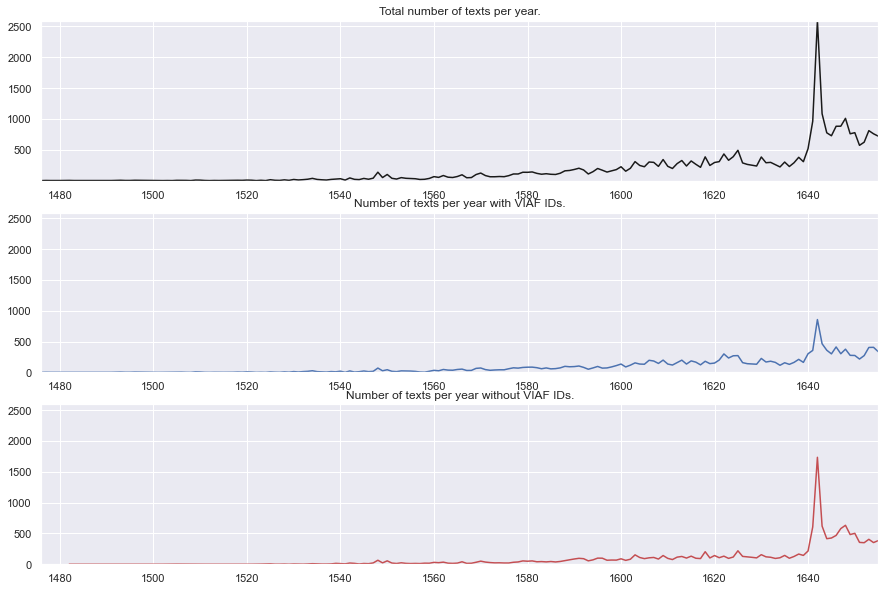

In [3]:
# Change these values to zoom in on shorter yearspans
start_year = 1400
end_year = 1660

total_counts = printers_df.groupby(['parsed_year'])['parsed_year'].count()
viaf_exists_counts = viaf_exists.groupby(['parsed_year'])['parsed_year'].count()
viaf_needed_counts = viaf_needed.groupby(['parsed_year'])['parsed_year'].count()

# Set up the plot
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(15,10))
grid = plt.GridSpec(3,1)
axes = [fig.add_subplot(grid[0, 0]), fig.add_subplot(grid[1, 0]), fig.add_subplot(grid[2, 0])]

sns.lineplot(data=total_counts, x=total_counts.index, y=total_counts.values, color='k', ax=axes[0])
sns.lineplot(data=viaf_exists_counts, x=viaf_exists_counts.index, y=viaf_exists_counts.values, color='b', ax=axes[1])
sns.lineplot(data=viaf_needed_counts, x=viaf_needed_counts.index, y=viaf_needed_counts.values, color='r', ax=axes[2])

start_year = start_year if total_counts.index[0] < start_year else total_counts.index[0]
end_year = end_year if total_counts.index[-1] > end_year else total_counts.index[-1]
axes[0].set(xlim=(start_year, end_year), ylim=(1, max(total_counts.values)), xlabel=None, title='Total number of texts per year.')
axes[1].set(xlim=(start_year, end_year), ylim=(0, max(total_counts.values)), xlabel=None, title='Number of texts per year with VIAF IDs.')
axes[2].set(xlim=(start_year, end_year), ylim=(0, max(total_counts.values)), xlabel=None, title='Number of texts per year without VIAF IDs.')

print('Total Number of texts:  {:,}\nTexts with VIAF IDs:    {:,}\nTexts without VIAF IDs: {:,}'\
          .format(len(printers_df), len(viaf_exists), len(viaf_needed)))

# Parse Printer Names

Parse printer names in the VIAF needed dataframe to identify those most likely to be names. This can likely be done with some basic regex patterns that look for firstname/initial lastname/initial patterns. Once these names are identified, we'll try to cluster them to find potential variants that should be mapped on to the same name. 

In [4]:
viaf_needed

,tcpid,role,name,name #2,Entity Identifiers Column,title,author,parsed_year,notBefore,notAfter,year,publicationStmt
9,A05603,printer,[s] lettou [et] Will[es] de machlinia i citate...,[s] lettou [et] Will[es] de machlinia i citate...,NaN,Tenannt en fee simple est celuy ...,"Littleton, Thomas, Sir, d. 1481.",1482,NaN,NaN,[1482]],Imp[re]ssi p[er] nos Ioh[an]e[s] lettou [et] W...
14,A06558,printer,Wyllyam Caxton,William Caxton,NaN,[The lyf of our lady],"Lydgate, John, 1370?-1451?",1484,NaN,NaN,1484],"Enprynted by Wyllyam Caxton, [Westminster : 1484]"
48,A97376,publisher,Nicholas Lecomte,Nicholas Lecomte,NaN,Hore beate marie virginis secundum vsum Sarum,Catholic Church.,1498,NaN,NaN,1498],"I. Iehannot [for Nicholas Lecomte, [Paris] : 1..."
56,A23592,printer,"one some tyme scole mayster of saynt Albons, v...","one some tyme scole mayster of saynt Albons, v...",NaN,Tabula,"Higden, Ranulf, d. 1364. Polycronicon. English...",1502,NaN,NaN,[1502]],[Enprynted by one some tyme scole mayster of s...
61,A19314,printer,Wynkyn de Warde [sic],Wynkyn de Warde,NaN,[The complaint of them that be too late married],"Gringore, Pierre, ca. 1475-1538?",1505,NaN,NaN,[1505?]],Empre[n]ted in fletestrete by Wynkyn de Warde ...
...,...,...,...,...,...,...,...,...,...,...,...,...
31557,B17645,printer,I.C.,I.C.,NaN,Of the eternity of Gods election the certainty...,"Bennett, John, a servant of Christ and his chu...",1655,NaN,NaN,1655,"Printed by I.C. for Livewel Chapman, London : ..."
31560,B19634,publisher,John Wright the younger,John Wright the younger,NaN,"Cupids wanton wiles: or, The young mans friend...","L. P. (Laurence Price), fl. 1625-1680?",1655,NaN,NaN,[ca. 1655],"for John Wright the younger, dwelling in the O..."
31562,B20843,printer,Iohn Field,John Field,NaN,"Wednesday, February 13, 1655, at the council a...",England and Wales. Lord Protector (1653-1658 :...,1655,NaN,NaN,1655,"Printed by Henry Hills, and Iohn Field, Printe..."
31564,B20857,printer,Iohn Fields,Iohn Fields,NaN,"By the Protector, a proclamation giving encour...",England and Wales. Lord Protector (1653-1658 :...,1655,NaN,NaN,MDCLV [1655],"Printed by Henry Hills and Iohn Fields ..., Lo..."


## Some early Exploration about common misspellings into the database
These numbers may be low but remember this is of the names that have not already been asigned a identifier (i.e. half the database)

So far I compared John-Iohn, William-Wyllyam, and counted number of "me "

In [5]:
#compare john to iohn
#create a mask for john and John
john_mask = viaf_needed["name"].str.contains("John", case=False)
#count the number of times the mask evaluated to true
john_count = john_mask.sum()
#create a mask for iohn and Iohn
iohn_mask = viaf_needed["name"].str.contains("Iohn", case=False)
#count the number of times the mask evaluated to true
iohn_count = iohn_mask.sum()
print(f"Number of occurrences of 'John' or 'john': {john_count} \n Number of occurrences of 'Iohn' or 'iohn': {iohn_count}")
#compare william to wyllyam (same procedure as above)
will_mask = viaf_needed["name"].str.contains("William", case=False)
will_count = will_mask.sum()
wyyll_mask = viaf_needed["name"].str.contains("Wyllyam", case=False)
wyll_count = wyyll_mask.sum()
print(f"Number of occurrences of 'William' or 'william': {will_count} \n Number of occurrences of 'Wyllyam' or 'wyllyam': {wyll_count}")
#number of occurences of "me " at beginning of name
# Define a regular expression pattern to match "me " at the beginning of each cell. ^ = beginning of the text
pattern = r"^me "
# Count the number of times the pattern occurs in each cell of the "name" column
counts = viaf_needed["name"].str.count(pattern)
# Sum the count of pattern occurrences to get the total count
total_count = counts.sum()
# Print the total count
print("Number of occurrences of 'me ' at the beginning of each cell:", total_count)



Number of occurrences of 'John' or 'john': 1024 
 Number of occurrences of 'Iohn' or 'iohn': 1437
Number of occurrences of 'William' or 'william': 637 
 Number of occurrences of 'Wyllyam' or 'wyllyam': 30
Number of occurrences of 'me ' at the beginning of each cell: 53


# Edit Distance Calculations

The following section uses the python module Levenshtein* to count the edit distance. 
The script works by looping through the list of names and calculating the distance between names. The distance value that is calculated is the number of edits; therefore, fewer edits is better. The number of edits is capped with the threshold variable, and changing this to a lower number will great fewer yet higher fidelity results. 

After calculating the distance the script then creates a list of three closest names that are less than 10 edits away. If there is at least one similar name passing the threshold, it is outputted at the end.

However, the metric is far from perfect. The following sections clean the data for better results.

*The Levenshtein distance between two words is the minimum number of single-character edits (insertions, deletions or substitutions) required to change one word into the other. [Wikiapedia](https://en.wikipedia.org/wiki/Levenshtein_distance) 

In [10]:
#levenshtein (edit) distance
import Levenshtein

# Get a list of unique names in the "Name" column
names = viaf_needed["name"].unique()

# Create an empty dictionary to store the results
result_dict = {}

# Set the maximum number of edits allowed between the names
threshold = 10

# Loop through each name in the list of unique names
for name in names:
    # Create an empty list to store the distances between this name and all other names
    distances = []
    
    # Loop through each name in the list of unique names
    for name2 in names:
        # Calculate the Levenshtein distance between the two names
        distance = Levenshtein.distance(name, name2, weights=(2,2,1))
        
        # Store the distance in the distances list
        if distance < threshold:
            distances.append((name2, distance))
    
    # Sort the distances list by the Levenshtein distance in ascending order
    distances = sorted(distances, key=lambda x: x[1])
    
    #if list of similar names is empty ignore and continue loop
    if len(distances) == 1:
        continue
    # Store the first three closest names and their Levenshtein distances in the result dictionary
    result_dict[name] = distances[1:4]

# Print the result dictionary
for name, similar_names in list(result_dict.items())[:10]:
    print(f"{name} is similar to: {', '.join([name_tuple[0] for name_tuple in similar_names])}")


Wyllyam Caxton is similar to: Wylliam Norton, William Norton, Wyllyam Powell
Nicholas Lecomte is similar to: Nicholas Browne, Nycholas le Roux, Nicholas England
me Iulyan Notary is similar to: me Iohan Butler
Wykyn de Worde is similar to: Iohn Herforde, me Wynken de Worde, Rycharde Lante
me Wynken de Worde is similar to: Wykyn de Worde
Ioh[a] Skot is similar to: Iohn Mariot, Iohn VVight, Iohn Norton
me Rychard Fakes is similar to: me Rychard faukes, me Rychard Bankes, me Rychard Lant
the yearde is similar to: the people, the church, the Palace
me Rychard faukes is similar to: me Rychard Bankes, me Rychard Fakes, me Rycharde Banckes
Petrus Treueris is similar to: me Petrum Treueris, me Peter Treueris, Peter Geuaerts


# Improving Levenshtein

The following section improves on the process by removing "me " from the beginning of the names column and by removing all punctuation

It also reduces the total number of edits allowed (i.e. threshold) to create higher fidelity results.

In [29]:
import string
#levenshtein (edit) distance (without "me ")
viaf_needed["name"] = viaf_needed["name"].str.replace("^me ", "", regex=True)

#remove punctuation
punctuation = string.punctuation

viaf_needed["name"] = viaf_needed["name"].str.replace(f"[{punctuation}]", "",regex=True)

# Get a list of unique names in the "Name" column
names = viaf_needed["name"].unique()

# Create an empty dictionary to store the results
result_dict = {}

# Set the maximum number of edits allowed between the names
threshold = 4

# Loop through each name in the list of unique names
for name in names:
    # Create an empty list to store the distances between this name and all other names
    distances = []
    
    # Loop through each name in the list of unique names
    for name2 in names:
        # Calculate the Levenshtein distance between the two names
        distance = Levenshtein.distance(name, name2)
        
        # Store the distance in the distances list
        if distance < threshold:
            distances.append((name2, distance))
    
    # Sort the distances list by the Levenshtein distance in ascending order
    distances = sorted(distances, key=lambda x: x[1])
    
    #if list of similar names is empty ignore and continue loop
    if len(distances) == 1:
        continue
    # Store the first three closest names and their Levenshtein distances in the result dictionary
    result_dict[name] = distances[1:4]

# Print the result dictionary
for name, similar_names in result_dict.items():
    print(f"{name} is similar to: {', '.join([name_tuple[0] for name_tuple in similar_names])}")

C:\Users\olove\AppData\Local\Temp\ipykernel_9544\2393397535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viaf_needed["name"] = viaf_needed["name"].str.replace("^me ", "", regex=True)
C:\Users\olove\AppData\Local\Temp\ipykernel_9544\2393397535.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viaf_needed["name"] = viaf_needed["name"].str.replace(f"[{punctuation}]", "",regex=True)


Wykyn de Worde is similar to: Wynken de Worde
Wynken de Worde is similar to: Wykyn de Worde
Ioha Skot is similar to: Iohn Skot, Iohan Skot
Rychard Fakes is similar to: Rychard faukes, Rycharde Fawkes, Richard Fawkes
Rychard faukes is similar to: Rychard Fakes, Rychard Bankes, Rycharde Fawkes
Petrus Treueris is similar to: Petrum Treueris, Peter Treueris
saynt Myldredes churche dore is similar to: saynt Myldredys church dore
Rycharde Fawkes is similar to: Rychard Fakes, Richard Fawkes, Rychard faukes
Peter Treueris is similar to: Peter Treuerys, Petrus Treueris, Petrum Treueris
saynt Myldredys church dore is similar to: saynt Myldredes churche dore
Iohan Butler is similar to: Iohan Mayler
Petrum Treueris is similar to: Petrus Treueris, Peter Treueris
Richard Fawkes is similar to: Rychard Fakes, Rycharde Fawkes, Rychard faukes
Peter Treuerys is similar to: Peter Treueris
Robert wyre is similar to: Robart wyer, Robert Bird, Robert Sele
to sell is similar to: H Bell, J Bell
Iohan Goughe is